In [ ]:
#import libraries
from google.colab import files
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
#Opening the file
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
# Finding Missing Values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [22]:
#Check for Duplicates
df["duplicated"] = df.duplicated()

df.loc[df["duplicated"] == True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,duplicated


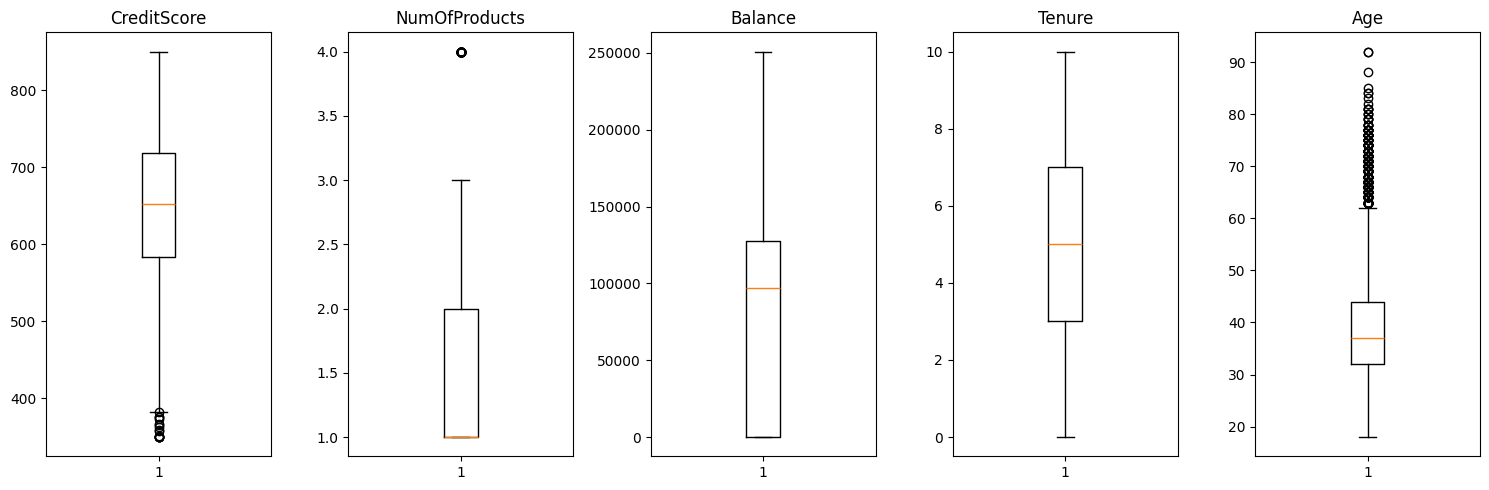

In [27]:
#Detect Outliers
import matplotlib.pyplot as plt
data = ["CreditScore", "NumOfProducts", "Balance", "Tenure", "Age"]
fig, axes =  plt.subplots(1, 5, figsize =(15,5))

for i, col in enumerate(data):
  axes[i].boxplot(df[col])
  axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

In [32]:
#Normalize the dataset
standard = StandardScaler()

cols = ['Surname','Geography','Gender','duplicated']
df_copy = df.drop(columns = cols)
df_copy = pd.DataFrame(standard.fit_transform(df_copy_1), columns=df_copy_1.columns)
df_copy.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [34]:
#split the dataset into input and output
input_df = df_copy.drop('Exited', axis = 1)

input_df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [35]:
output_df = df_copy['Exited']

output_df

,Exited
0,1.977165
1,-0.505775
2,1.977165
3,-0.505775
4,-0.505775
...,...
9995,-0.505775
9996,-0.505775
9997,1.977165
9998,1.977165


In [36]:
#splitting the data for training & Testing
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.3, random_state =434)

In [37]:
#Print the training data and testing data
x_train

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2626,-0.822205,-1.621192,-0.853907,-0.946079,-1.041760,0.844486,0.807737,-1.547768,0.970243,0.078733
8368,1.166883,-0.740284,-0.295181,-0.469311,0.687130,0.355639,-0.911583,0.646092,-1.030670,0.674982
7330,0.807309,1.545411,-2.405923,-0.469311,1.032908,1.273963,-0.911583,0.646092,-1.030670,0.941070
9464,1.546548,1.321994,0.925738,0.007457,1.378686,-1.225848,0.807737,0.646092,-1.030670,-1.409257
1013,-1.380964,-1.214284,-0.160673,-1.422847,-0.350204,-1.225848,0.807737,0.646092,0.970243,-0.511610
...,...,...,...,...,...,...,...,...,...,...
6341,0.464709,-0.452876,1.618972,0.102810,-1.387538,0.931244,-0.911583,0.646092,0.970243,-0.936165
5697,0.241621,-0.266382,-0.864254,0.007457,-0.004426,-1.225848,0.807737,-1.547768,-1.030670,1.189955
9541,1.573222,-0.300984,-0.491770,-0.087897,1.032908,-0.274466,-0.911583,0.646092,0.970243,1.588778
5554,0.192084,1.296734,-0.315875,-0.087897,-1.733315,-1.225848,0.807737,0.646092,0.970243,-1.079420


In [38]:
y_train

,Exited
2626,-0.505775
8368,1.977165
7330,-0.505775
9464,-0.505775
1013,-0.505775
...,...
6341,-0.505775
5697,-0.505775
9541,-0.505775
5554,-0.505775


In [40]:
x_test

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9934,1.709361,1.162831,0.429093,0.388871,1.724464,0.674788,-0.911583,0.646092,0.970243,1.063362
9186,1.450246,-1.688923,0.015222,1.819175,-0.695982,0.638958,0.807737,-1.547768,0.970243,1.624353
7267,0.785485,0.471420,-1.485060,-0.755372,1.378686,0.562612,-0.911583,0.646092,-1.030670,0.868528
3070,-0.668398,1.441912,0.242851,-0.660018,-1.041760,-1.225848,0.807737,0.646092,-1.030670,0.704062
1514,-1.207413,1.358709,-1.153963,-0.087897,1.032908,-0.080540,0.807737,0.646092,0.970243,-1.565292
...,...,...,...,...,...,...,...,...,...,...
6986,0.688144,0.158988,-0.243447,0.865639,-1.387538,0.901908,-0.911583,0.646092,-1.030670,-0.368491
1864,-1.086169,1.589981,-0.450383,0.579578,0.687130,0.759264,-0.911583,-1.547768,0.970243,0.225385
4002,-0.345544,1.675811,-0.171020,-0.946079,1.032908,0.858257,0.807737,-1.547768,0.970243,-0.525855
4157,-0.291851,0.401104,2.063884,2.200589,-0.004426,-1.225848,0.807737,0.646092,0.970243,1.393786


In [41]:
y_test

,Exited
9934,1.977165
9186,-0.505775
7267,-0.505775
3070,-0.505775
1514,-0.505775
...,...
6986,-0.505775
1864,-0.505775
4002,-0.505775
4157,-0.505775
